
Analyzing Numerical Column: SepalLengthCm
Mean: 5.843333333333334
Median: 5.8
Mode: 5.0
Standard Deviation: 0.8280661279778629
Variance: 0.6856935123042505
Range: [4.3, 7.9]


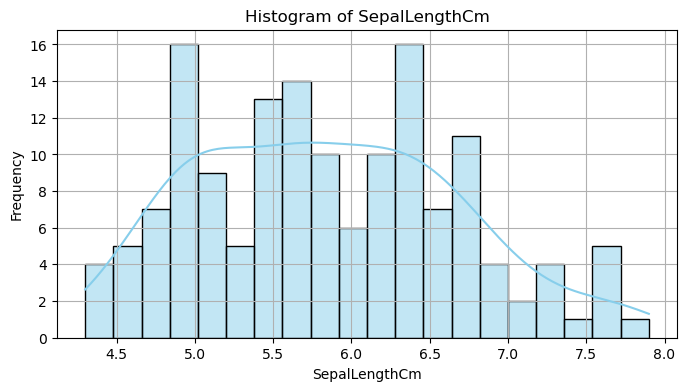

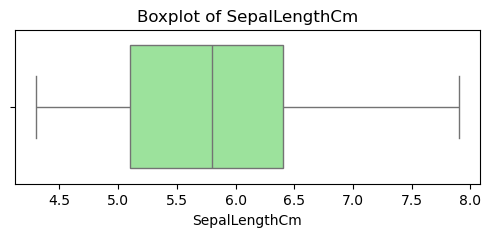


Number of outliers detected in 'SepalLengthCm': 0
Empty DataFrame
Columns: [SepalLengthCm]
Index: []

Analyzing Categorical Column: Species
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


C:\Users\gnpav\AppData\Local\Temp\ipykernel_5160\291097993.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[cat_col], palette='pastel')


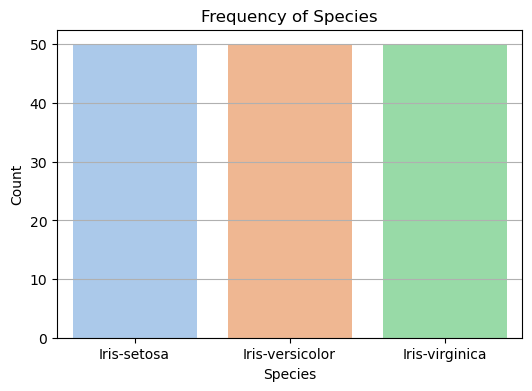

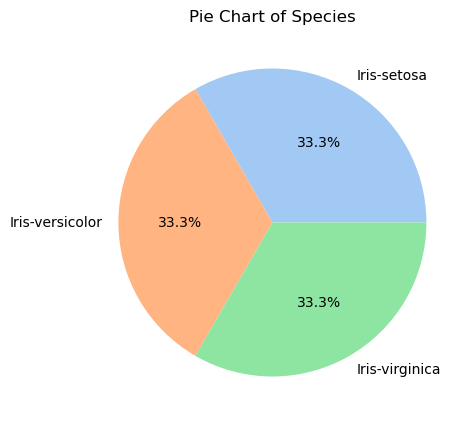

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Iris.csv")


num_col = 'SepalLengthCm'  
print(f"\nAnalyzing Numerical Column: {num_col}")


mean_val = df[num_col].mean()
median_val = df[num_col].median()
mode_val = df[num_col].mode().values[0]
std_dev = df[num_col].std()
variance = df[num_col].var()
value_range = [df[num_col].min(),df[num_col].max()]

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {value_range}")


plt.figure(figsize=(8, 4))
sns.histplot(df[num_col], kde=True, bins=20, color='skyblue')
plt.title(f'Histogram of {num_col}')
plt.xlabel(num_col)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 2))
sns.boxplot(x=df[num_col], color='lightgreen')
plt.title(f'Boxplot of {num_col}')
plt.show()


Q1 = df[num_col].quantile(0.25)
Q3 = df[num_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[num_col] < lower_bound) | (df[num_col] > upper_bound)]

print(f"\nNumber of outliers detected in '{num_col}': {len(outliers)}")
print(outliers[[num_col]])


cat_col = 'Species' 
print(f"\nAnalyzing Categorical Column: {cat_col}")


cat_counts = df[cat_col].value_counts()
print(cat_counts)


plt.figure(figsize=(6, 4))
sns.countplot(x=df[cat_col], palette='pastel')
plt.title(f'Frequency of {cat_col}')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(5, 5))
plt.pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title(f'Pie Chart of {cat_col}')
plt.show()


First 5 rows of the dataset:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
1             5.1           3.5            1.4           0.2
2             4.9           3.0            1.4           0.2
3             4.7           3.2            1.3           0.2
4             4.6           3.1            1.5           0.2
5             5.0           3.6            1.4           0.2


C:\Users\gnpav\AppData\Local\Temp\ipykernel_5160\2509847463.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x_col, y=y_col,  palette='deep')


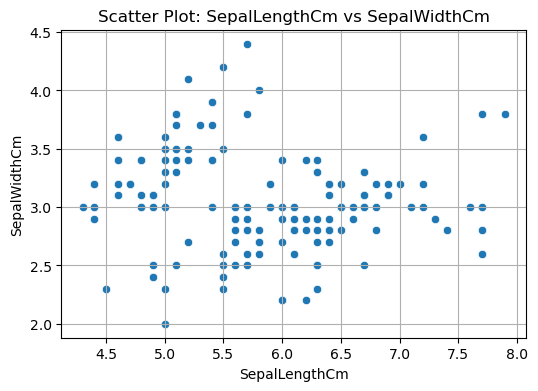


Pearson Correlation between SepalLengthCm and SepalWidthCm: -0.109

Covariance Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       0.685694     -0.039268       1.273682      0.516904
SepalWidthCm       -0.039268      0.188004      -0.321713     -0.117981
PetalLengthCm       1.273682     -0.321713       3.113179      1.296387
PetalWidthCm        0.516904     -0.117981       1.296387      0.582414

Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


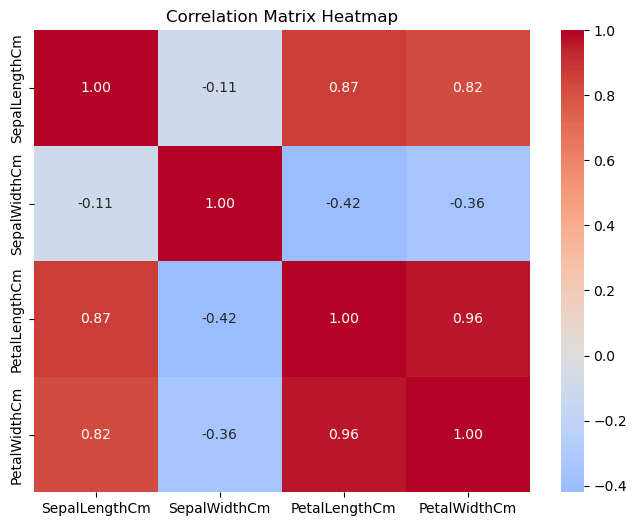

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Iris.csv",index_col=0)
df=df.select_dtypes(include='number')

print("First 5 rows of the dataset:")
print(df.head())


x_col = 'SepalLengthCm'
y_col = 'SepalWidthCm'

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x=x_col, y=y_col,  palette='deep')
plt.title(f'Scatter Plot: {x_col} vs {y_col}')
plt.grid(True)
plt.show()


pearson_corr = df[x_col].corr(df[y_col])
print(f"\nPearson Correlation between {x_col} and {y_col}: {pearson_corr:.3f}")


cov_matrix = df.cov()
print("\nCovariance Matrix:")
print(cov_matrix)


corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


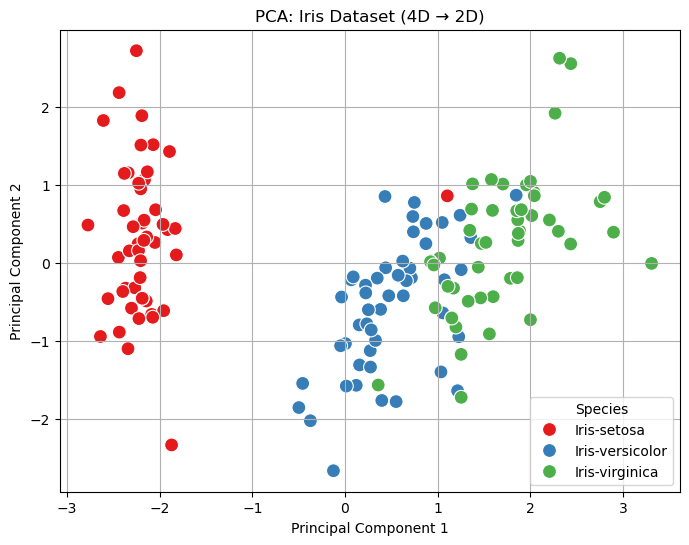


Explained Variance Ratio:
PC1: 0.7277045209380135
PC2: 0.23030523267680644
total vairance retained: 0.95800975361482


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Iris.csv", index_col=0)

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[features]
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set1', s=100)
plt.title('PCA: Iris Dataset (4D → 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

explained_variance=pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")

print(f"PC1: {explained_variance[0]}")
print(f"PC2: {explained_variance[1]}")
print(f"total vairance retained: {sum(explained_variance)}")



In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

df = pd.read_csv("Iris.csv", index_col=0)
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df[features]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False):
    results = {}
    for k in k_values:
        if weighted:
            
            knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        else:
            
            knn = KNeighborsClassifier(n_neighbors=k, weights='uniform')

        
        knn.fit(X_train, y_train)

        
        y_pred = knn.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)

        
        f1 = f1_score(y_test, y_pred, average='weighted')
        results[k] = {'accuracy': accuracy, 'f1_score': f1}

    return results

k_values = [1, 3, 5]

print("Regular k-NN Results:")
regular_results = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=False)

for k, metrics in regular_results.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.2f}, F1-Score={metrics['f1_score']:.2f}")


print("\nWeighted k-NN Results:")
weighted_results = cls_knn(X_train, X_test, y_train, y_test, k_values, weighted=True)

for k, metrics in weighted_results.items():
    print(f"k={k}: Accuracy={metrics['accuracy']:.2f}, F1-Score={metrics['f1_score']:.2f}")

print("\nComparison of Regular k-NN and Weighted k-NN:")

for k in k_values:
    regular_acc = regular_results[k]['accuracy']
    weighted_acc = weighted_results[k]['accuracy']
    
    print(f"k={k}: Regular k-NN Accuracy={regular_acc:.2f}, Weighted k-NN Accuracy={weighted_acc:.2f}")

Regular k-NN Results:
k=1: Accuracy=1.00, F1-Score=1.00
k=3: Accuracy=1.00, F1-Score=1.00
k=5: Accuracy=1.00, F1-Score=1.00

Weighted k-NN Results:
k=1: Accuracy=1.00, F1-Score=1.00
k=3: Accuracy=1.00, F1-Score=1.00
k=5: Accuracy=1.00, F1-Score=1.00

Comparison of Regular k-NN and Weighted k-NN:
k=1: Regular k-NN Accuracy=1.00, Weighted k-NN Accuracy=1.00
k=3: Regular k-NN Accuracy=1.00, Weighted k-NN Accuracy=1.00
k=5: Regular k-NN Accuracy=1.00, Weighted k-NN Accuracy=1.00


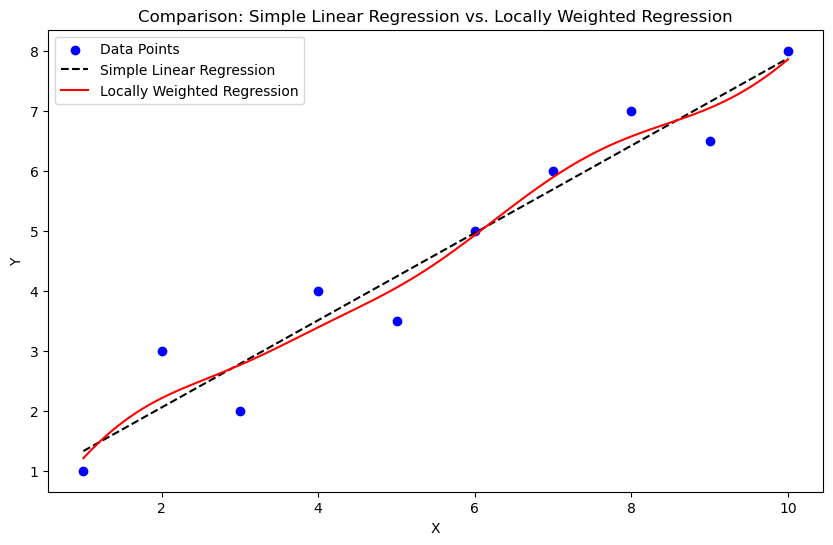

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def gaussian_kernel(x, x_query, tau):
    return np.exp(- (x - x_query) ** 2 / (2 * tau ** 2))

def locally_weighted_regression(X, y, x_query, tau):
    X_b = np.c_[np.ones(len(X)), X]  # Add bias term (Intercept)
    x_query_b = np.array([1, x_query])  # Query point with bias term
    
    W = np.diag(gaussian_kernel(X, x_query, tau))  # Compute weights
    
    # Compute theta: (X^T W X)^-1 X^T W y
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ X_b.T @ W @ y
    
    return x_query_b @ theta  # Return prediction

# Complex Dataset
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 8])

# Query points for LWR
X_query = np.linspace(1, 10, 100)

tau = 1.0  # Bandwidth parameter   

# Compute LWR predictions
y_lwr = np.array([locally_weighted_regression(X, y, x_q, tau) for x_q in X_query])

# Simple Linear Regression
lin_reg = LinearRegression()
X_reshaped = X.reshape(-1, 1)
lin_reg.fit(X_reshaped, y)
y_lin = lin_reg.predict(X_query.reshape(-1, 1))

# Visualizing
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_query, y_lin, color='black', linestyle='dashed', label='Simple Linear Regression')
plt.plot(X_query, y_lwr, color='red', label='Locally Weighted Regression')
plt.title("Comparison: Simple Linear Regression vs. Locally Weighted Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


📘 LINEAR REGRESSION ON BOSTON HOUSING DATASET
R² Score: 0.3708
MSE: 46.14

🚗 POLYNOMIAL REGRESSION ON AUTO MPG DATASET
R² Score: 0.6392
MSE: 18.42


d:\Conda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


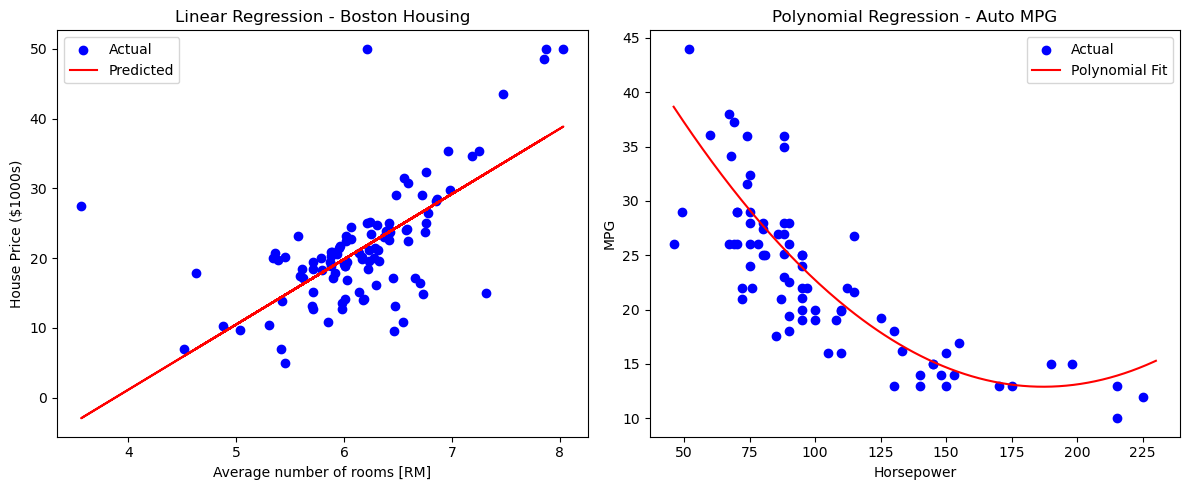

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Linear Regression - Boston Housing

print("\n LINEAR REGRESSION ON BOSTON HOUSING DATASET")

boston = pd.read_csv("Boston housing dataset.csv")

X = boston[['RM']]  
y = boston['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('House Price ($1000s)')
plt.title('Linear Regression - Boston Housing')
plt.legend()


print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


# Polynomial Regression - Auto MPG



print("\n POLYNOMIAL REGRESSION ON AUTO MPG DATASET")

Mpg = pd.read_csv("auto-mpg.csv")

Mpg = Mpg[Mpg['horsepower'] != '?']
Mpg['horsepower'] = Mpg['horsepower'].astype(float)

X = Mpg[['horsepower']].astype(float)  
y = Mpg['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")


plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
x_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
plt.plot(x_range, model.predict(poly.transform(x_range)), color='red', label='Polynomial Fit')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression - Auto MPG')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\gnpav\AppData\Local\Temp\ipykernel_5160\1448095123.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


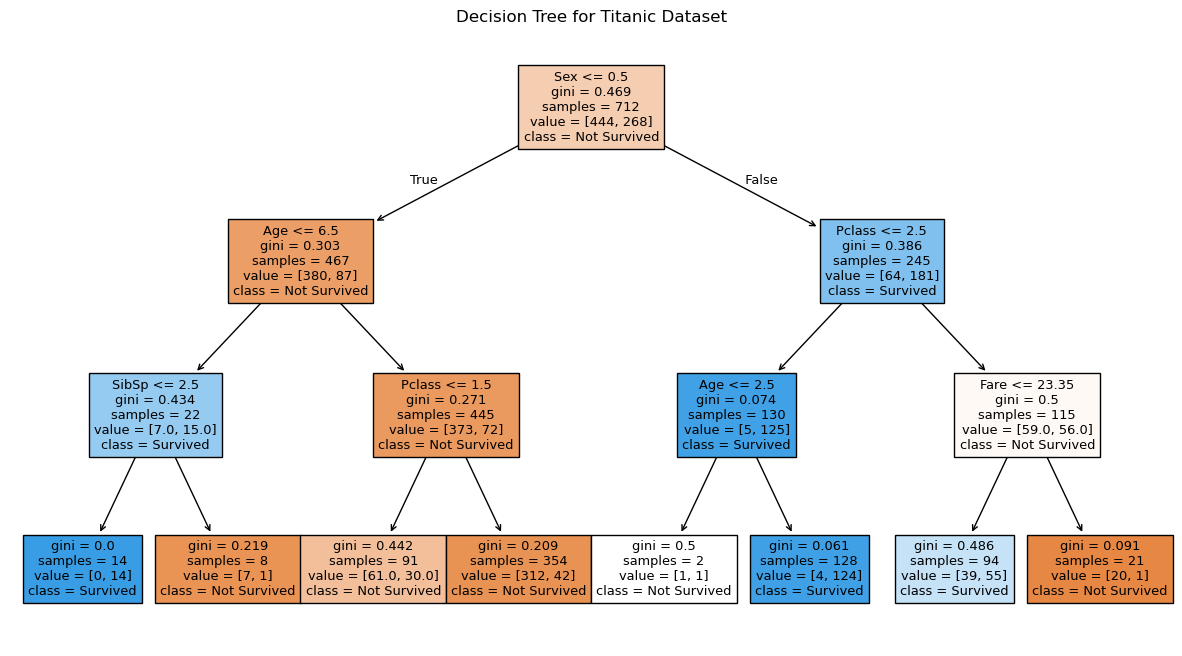

Model Evaluation Metrics:
Accuracy  : 0.7989
Precision : 0.7969
Recall    : 0.6892
F1 Score  : 0.7391


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic-Dataset.csv")
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree for Titanic Dataset")
plt.show()

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


d:\Conda\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


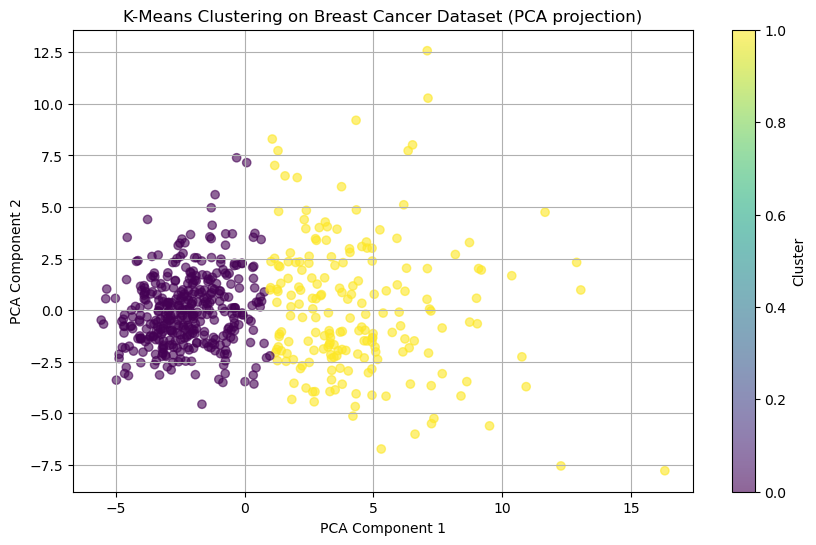

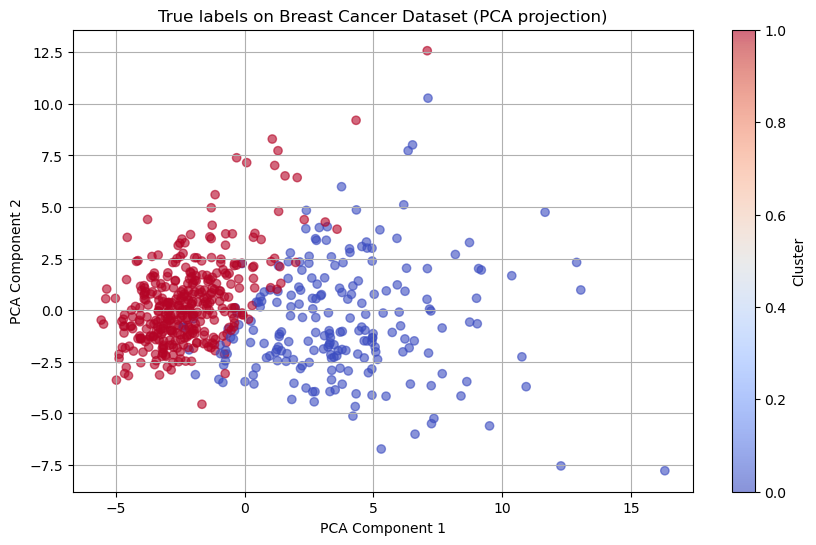

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv("Wisconsin Breast Cancer dataset.csv",index_col=0)
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})
X=df.drop(columns=['diagnosis','Unnamed: 32'])
y = df['diagnosis']  
print(X.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering on Breast Cancer Dataset (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.6)
plt.title("True labels on Breast Cancer Dataset (PCA projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
